# Performing Regression Analysis in Python to predict the bottom hole circulating temperature in a High Pressure / High Temperature Haynesville Shale Horizontal well

## This model was developed for predicting temperature in future wells drilled with a 7-7/8" production hole instead of a 6-3/4" production hole.  The project is organized as follows: (a) data processing and variable selection;  (b) regression analysis (c) predictive results.

### Author: Isaac Shareef  
#### Date: 27 April, 2020

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from statistics import mean

### 1) Reading the data from a CSV file and displaying the data and attributes of the data frame

In [124]:
data = pd.read_csv("/Users/isaacshareef/Desktop/Python_Codecademy/Jupyter_Notebook/test.csv")
data.shape
print(data)

                                Name    Depth  Temperature     ROP
0       HA RA SU60 JONES 2-35HC 1ALT  10085.0      -999.25 -999.25
1       HA RA SU60 JONES 2-35HC 1ALT  10086.0      -999.25 -999.25
2       HA RA SU60 JONES 2-35HC 1ALT  10087.0       229.65 -999.25
3       HA RA SU60 JONES 2-35HC 1ALT  10088.0       227.31 -999.25
4       HA RA SU60 JONES 2-35HC 1ALT  10089.0       224.11 -999.25
...                              ...      ...          ...     ...
111820                           NaN      NaN          NaN     NaN
111821                           NaN      NaN          NaN     NaN
111822                           NaN      NaN          NaN     NaN
111823                           NaN      NaN          NaN     NaN
111824                           NaN      NaN          NaN     NaN

[111825 rows x 4 columns]


### 2) The data above relects that there are 111,825 rows with columns; well name["Name"], ["Depth"], ["Temperature"], & ["ROP"](Rate of Penetration).  The data shows that there are data points such as -999.25 for ROP and Temperature that are erroneous readings.  We will have to remove any rows with erroneous data.  I am also excluding any data above 9,999' measured depth as this data does not affect the wellbore dynamic temperature profile.

In [125]:
data = data[data.Temperature > 1]
data = data[data.Temperature < 360]
data = data[data.ROP > 0]
data = data[data.Depth >10000]
print(data)

                                Name    Depth  Temperature    ROP
57      HA RA SU60 JONES 2-35HC 1ALT  10142.0       215.53   9.34
58      HA RA SU60 JONES 2-35HC 1ALT  10143.0       215.53  21.67
59      HA RA SU60 JONES 2-35HC 1ALT  10144.0       215.53  30.42
60      HA RA SU60 JONES 2-35HC 1ALT  10145.0       215.53  31.94
61      HA RA SU60 JONES 2-35HC 1ALT  10146.0       215.53  30.76
...                              ...      ...          ...    ...
96776  HA RA SU60 JONES 2-11HC 1 ALT  17913.0       303.77  16.61
96777  HA RA SU60 JONES 2-11HC 1 ALT  17914.0       303.77  24.73
96778  HA RA SU60 JONES 2-11HC 1 ALT  17915.0       303.77  29.61
96779  HA RA SU60 JONES 2-11HC 1 ALT  17916.0       303.77  31.88
96780  HA RA SU60 JONES 2-11HC 1 ALT  17917.0       303.77  31.45

[75892 rows x 4 columns]


### 3) There are 7 discreet well names in the main dataframe ("data") and we want to seperate them out for independent analysis of their regression.  This will help us to determine how the engineered changes to the well impacted the dynamic temperature profile created while drilling.  Using reset.index will reset the inidices so that each well header column is labeled as row zero and progressively counts up to the last data point.

In [126]:
j_2_11_1a = data[data['Name'] == "HA RA SU60 JONES 2-11HC 1 ALT"]
j_2_11_1a.reset_index(inplace = True, drop = True)

j_2_11_2a = data[data['Name'] == "HA RA SU60 JONES 2-11HC 2 ALT"]
j_2_11_2a.reset_index(inplace = True, drop = True)

e_2_11_1a = data[data['Name'] == "HA RA SU60 ELSTON 2-11HC 1 ALT"]
e_2_11_1a.reset_index(inplace = True, drop = True)  

e_2_11_2a = data[data['Name'] == "HA RA SU60 ELSTON 2-11HC 2 ALT"]
e_2_11_2a.reset_index(inplace = True, drop = True)

e_2_11_2aST = data[data['Name'] == "HA RA SU60 ELSTON 2-11HC 2 ALT ST01"]
e_2_11_2aST.reset_index(inplace = True, drop = True)

j_2_35_1a = data[data['Name'] == "HA RA SU60 JONES 2-35HC 1ALT"]
j_2_35_1a.reset_index(inplace = True, drop = True)

j_2_35_2a = data[data['Name'] == "HA RA SU60 JONES 2-35HC 2ALT"]
j_2_35_2a.reset_index(inplace = True, drop = True)


### 4) Plotting temeprature(y-axis) vs depth(x-axis) profiles of 6/7 wells in the dataset.  I excluded the  e_2_11_2aST well.  This well is a sidetrack of the e_2_11_2a well and the data set compared to its original wellbore is identical as the offset wellbores were spaced a minimal distance apart.  The two wells with black scatter circles are the wells that have larger production hole diameters.  They are designed with larger hole diamters to lower the contribution of heat generated through pumping of oil based drilling fluid.  Each subplot has a unique number associated with it.  That number will be used to help differentiate wells in the regression analysis. 

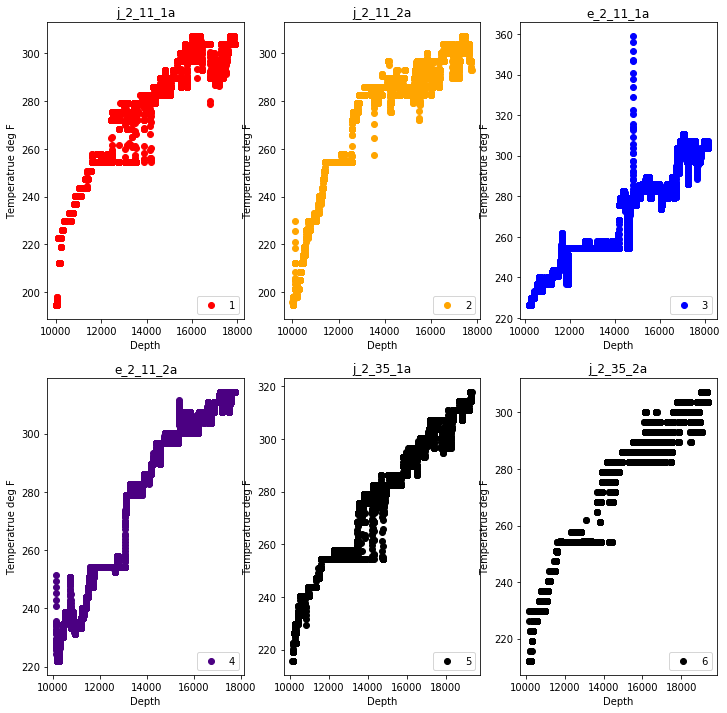

In [127]:
fig, axs = plt.subplots(2,3, figsize = (12,12))
axs[0,0].scatter(j_2_11_1a['Depth'], j_2_11_1a['Temperature'], color = 'red')
axs[0,0].set_title('j_2_11_1a')
axs[0,0].legend('1', loc="lower right")

axs[0,1].scatter(j_2_11_2a['Depth'], j_2_11_2a['Temperature'], color = 'orange')
axs[0,1].set_title('j_2_11_2a')
axs[0,1].legend('2', loc="lower right")

axs[0,2].scatter(e_2_11_1a['Depth'], e_2_11_1a['Temperature'], color = 'blue')
axs[0,2].set_title('e_2_11_1a')
axs[0,2].legend('3', loc="lower right")

axs[1,0].scatter(e_2_11_2a['Depth'], e_2_11_2a['Temperature'], color = 'indigo')
axs[1,0].set_title('e_2_11_2a')
axs[1,0].legend('4', loc="lower right")

axs[1,1].scatter(j_2_35_1a['Depth'], j_2_35_1a['Temperature'], color = 'black')
axs[1,1].set_title('j_2_35_1a')
axs[1,1].legend('5', loc="lower right")

axs[1,2].scatter(j_2_35_2a['Depth'], j_2_35_2a['Temperature'], color = 'black')
axs[1,2].set_title('j_2_35_2a')
axs[1,2].legend('6', loc="lower right")

for ax in axs.flat:
    ax.set(xlabel='Depth', ylabel='Temperatrue deg F')



## Observation from part 1.  All of the wells have similar depth vs temperature profiles.  The long string of vertical dots in the e_2_11_1a is consistent with temperature rise during a periodic shutdown of drilling.  I elected to include that temperature data because those values were consistent with operational procedures that allowed for continued heating under certain circumstances. 

### 5)The code below begins the regression analysis using sklearn.linear_model LinearRegression.  We will process the regression and add the individual coefficients and intercepts to Python lists for further analysis.  

In [128]:
#setting temp and depth values for regression model_1
coeffs_old = []
inter_old = []
coeffs_new = []
inter_new = []

temp_1 = j_2_11_1a['Temperature']
temp_1 = temp_1.values.reshape(-1,1)
depth_1 = j_2_11_1a['Depth']
depth_1 = depth_1.values.reshape(-1,1)

#Linear regression calculations and temperature prediction calculation model_1
regression1 = LinearRegression()
regression1.fit(depth_1, temp_1)
temp_predict_1 = regression.predict(depth_1)

#adding values to Temp_Depth_Dict
coeffs_old.append(float(regression1.coef_))
inter_old.append(float(regression1.intercept_))


#printing individual coefficients and intercepts for display
print("The Coefficient for model_1 is {}".format(float(regression1.coef_)))
print("The Intercept for model_1 is {}".format(float(regression1.intercept_)))
print(" ")

#setting temp and depth values for regression model_2
temp_2 = j_2_11_2a['Temperature']
temp_2 = temp_2.values.reshape(-1,1)
depth_2 = j_2_11_2a['Depth']
depth_2 = depth_2.values.reshape(-1,1)

#Linear regression calculations and temperature prediction calculation model_2
regression2 = LinearRegression()
regression2.fit(depth_2, temp_2)
temp_predict_2 = regression.predict(depth_2)

#adding values to Temp_Depth_Dict
coeffs_old.append(float(regression2.coef_))
inter_old.append(float(regression2.intercept_))


#printing individual coefficients and intercepts for display
print("The Coefficient for model_2 is {}".format(float(regression2.coef_)))
print("The Intercept for model_2 is {}".format(float(regression2.intercept_)))
print(" ")

#setting temp and depth values for regression model_3
temp_3 = e_2_11_1a['Temperature']
temp_3 = temp_3.values.reshape(-1,1)
depth_3 = e_2_11_1a['Depth']
depth_3 = depth_3.values.reshape(-1,1)

#Linear regression calculations and temperature prediction calculation model_3
regression3 = LinearRegression()
regression3.fit(depth_3, temp_3)
temp_predict_3 = regression.predict(depth_3)

#adding values to Temp_Depth_Dict
coeffs_old.append(float(regression3.coef_))
inter_old.append(float(regression3.intercept_))


#printing individual coefficients and intercepts for display
print("The Coefficient for model_3 is {}".format(float(regression3.coef_)))
print("The Intercept for model_3 is {}".format(float(regression3.intercept_)))
print(" ")

#setting temp and depth values for regression model_4
temp_4 = e_2_11_2a['Temperature']
temp_4 = temp_4.values.reshape(-1,1)
depth_4 = e_2_11_2a['Depth']
depth_4 = depth_4.values.reshape(-1,1)

#Linear regression calculations and temperature prediction calculation model_4
regression4 = LinearRegression()
regression4.fit(depth_4, temp_4)
temp_predict_4 = regression.predict(depth_4)

#adding values to Temp_Depth_Dict
coeffs_old.append(float(regression4.coef_))
inter_old.append(float(regression4.intercept_))


#printing individual coefficients and intercepts for display
print("The Coefficient for model_4 is {}".format(float(regression4.coef_)))
print("The Intercept for model_4 is {}".format(float(regression4.intercept_)))
print(" ")

#setting temp and depth values for regression model_5
temp_5 = j_2_35_1a['Temperature']
temp_5 = temp_5.values.reshape(-1,1)
depth_5 = j_2_35_1a['Depth']
depth_5 = depth_5.values.reshape(-1,1)

#Linear regression calculations and temperature prediction calculation model_5
regression5 = LinearRegression()
regression5.fit(depth_5, temp_5)
temp_predict_5 = regression.predict(depth_5)

#adding values to Temp_Depth_Dict
coeffs_new.append(float(regression5.coef_))
inter_new.append(float(regression5.intercept_))


#printing individual coefficients and intercepts for display
print("The Coefficient for model_5 is {}".format(float(regression5.coef_)))
print("The Intercept for model_5 is {}".format(float(regression5.intercept_)))
print(" ")

#setting temp and depth values for regression model_6
temp_6 = j_2_35_2a['Temperature']
temp_6 = temp_6.values.reshape(-1,1)
depth_6 = j_2_35_2a['Depth']
depth_6 = depth_6.values.reshape(-1,1)

#Linear regression calculations and temperature prediction calculation model_6
regression6 = LinearRegression()
regression6.fit(depth_6, temp_6)
temp_predict_6 = regression.predict(depth_6)

#adding values to Temp_Depth_Dict
coeffs_new.append(float(regression6.coef_))
inter_new.append(float(regression6.intercept_))

#printing individual coefficients and intercepts for display
print("The Coefficient for model_6 is {}".format(float(regression6.coef_)))
print("The Intercept for model_6 is {}".format(float(regression6.intercept_)))
print(" ")


The Coefficient for model_1 is 0.009489266141600823
The Intercept for model_1 is 143.5571864899452
 
The Coefficient for model_2 is 0.011629842535631282
The Intercept for model_2 is 110.01669840155913
 
The Coefficient for model_3 is 0.009626350720365948
The Intercept for model_3 is 132.4605605700913
 
The Coefficient for model_4 is 0.012451865735474228
The Intercept for model_4 is 104.50602785150681
 
The Coefficient for model_5 is 0.009396804433091429
The Intercept for model_5 is 138.71125400296665
 
The Coefficient for model_6 is 0.008667680184596249
The Intercept for model_6 is 145.14499064595037
 


### 6) Plotting the individual temeprature(y-axis) vs depth(x-axis) profiles of 6/7 wells in the dataset with their associated coefficients and intercepts.

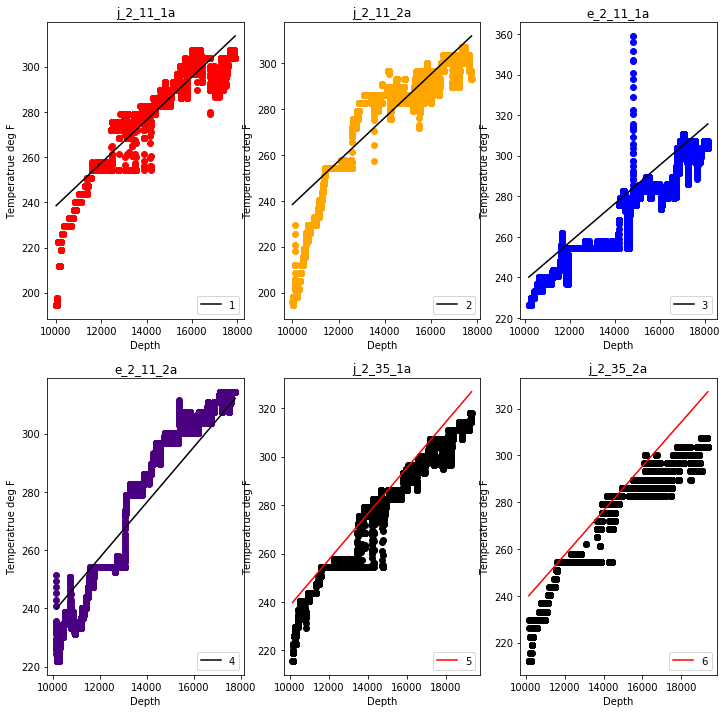

In [129]:
fig, axs = plt.subplots(2,3, figsize = (12,12))
axs[0,0].scatter(j_2_11_1a['Depth'], j_2_11_1a['Temperature'], color = 'red')
axs[0,0].plot(depth_1, temp_predict_1, color = 'black')
axs[0,0].set_title('j_2_11_1a')
axs[0,0].legend('1', loc="lower right")

axs[0,1].scatter(j_2_11_2a['Depth'], j_2_11_2a['Temperature'], color = 'orange')
axs[0,1].plot(depth_2, temp_predict_2, color = 'black')
axs[0,1].set_title('j_2_11_2a')
axs[0,1].legend('2', loc="lower right")

axs[0,2].scatter(e_2_11_1a['Depth'], e_2_11_1a['Temperature'], color = 'blue')
axs[0,2].plot(depth_3, temp_predict_3, color = 'black')
axs[0,2].set_title('e_2_11_1a')
axs[0,2].legend('3', loc="lower right")

axs[1,0].scatter(e_2_11_2a['Depth'], e_2_11_2a['Temperature'], color = 'indigo')
axs[1,0].plot(depth_4, temp_predict_4, color = 'black')
axs[1,0].set_title('e_2_11_2a')
axs[1,0].legend('4', loc="lower right")

axs[1,1].scatter(j_2_35_1a['Depth'], j_2_35_1a['Temperature'], color = 'black')
axs[1,1].plot(depth_5, temp_predict_5, color = 'red')
axs[1,1].set_title('j_2_35_1a')
axs[1,1].legend('5', loc="lower right")

axs[1,2].scatter(j_2_35_2a['Depth'], j_2_35_2a['Temperature'], color = 'black')
axs[1,2].plot(depth_6, temp_predict_6, color = 'red')
axs[1,2].set_title('j_2_35_2a')
axs[1,2].legend('6', loc="lower right")

for ax in axs.flat:
    ax.set(xlabel='Depth', ylabel='Temperatrue deg F')

In [130]:
avg_old_coeff = mean(coeffs_old)
avg_old_inter = mean(inter_old)
avg_new_coeff = mean(coeffs_new)
avg_new_inter = mean(inter_new)

print('The mean of the coefficients for the old well design is {:.4f}'.format(avg_old_coeff))
print('The mean of the intercepts for the old well design is {:.4f}'.format(avg_old_inter))
print('The predicted temperature at 19,000ft MD in the old well design is {:.2f} deg F'.format(avg_old_coeff*19000 + avg_old_inter))
print(" ")

print('The mean of the coefficients for the old well design is {:.4f}'.format(avg_new_coeff))
print('The mean of the intercepts for the old well design is {:.4f}'.format(avg_new_inter))
print('The predicted temperature at 19,000ft MD in the new well design is {:.2f} def F'.format(avg_new_coeff*19000 + avg_new_inter))



The mean of the coefficients for the old well design is 0.0108
The mean of the intercepts for the old well design is 122.6351
The predicted temperature at 19,000ft MD in the old well design is 327.82 deg F
 
The mean of the coefficients for the old well design is 0.0090
The mean of the intercepts for the old well design is 141.9281
The predicted temperature at 19,000ft MD in the new well design is 313.54 def F


## Final Obersavtions

## We can observe that the model is predicting that a well drilled with 6-3/4" production hole will have a bottom hole circulating temperature of 327 deg F and a well drilld with 7-7/8" production hole will have a bottom hole circulating temperature of 313 deg F at a depth of 19,000'MD. 

## There are a number of other parameters that factor into drilling with a cooler circulating temperature to include, drilling fluid density, drill pipe outer and inner diameters, total flow area of the drilling bit, to name a few.  The only parameters changed during this engineered change were the outer/inner diameter of the drill pipe, and the production hole size.

## This allowed us to drill deeper wells, in less time, for a substantial savings.